In [1]:
#pip install os
from google.colab import drive
import os 
import numpy as np
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# Load the data

In [5]:
#df = pd.read_csv('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/final_training_testing.csv')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df.head(2)
#sorted_df=df.sort_values(by='Timestamp_bid', ascending=True)

df = pd.read_csv('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/final_training_testing (1).csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(2)
sorted_df=df.sort_values(by='Timestamp_bid', ascending=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_1.shape

(532897, 69)

In [6]:
df.shape

(532897, 69)

In [7]:
df.head(1)

,Timestamp_bid,User-Agent_bid,Region ID_bids_join_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID,User Profile IDs_bid,Timestamp_imp,User-Agent_imp,Log Type,Paying Price,User Profile IDs_imp,n_impressions,Timestamp,User-Agent,User Profile IDs,Region ID_clicks,n_clicks,has impression,has click,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,20130606000104044,mozilla/4.0 (compatible; msie 8.0; windows nt 5.1; trident/4.0),80,80,1,300,250,0,1,0,227,3358,NaN,2.013061e+16,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0),1.0,62.0,"10006,10063,10110",1.0,NaN,NaN,NaN,NaN,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data related from impression to clicks

In [ ]:
features1=['Timestamp_bid'
  #, 'User-Agent_bid'
  , 'Region ID_bids_join_impressions'
  , 'City ID'
  , 'Ad Exchange'
  , 'Ad Slot Width'
  , 'Ad Slot Height'
  , 'Ad Slot Visibility'
  , 'Ad Slot Format'
  , 'Ad Slot Floor Price'
  , 'Bidding Price'
  , 'Advertiser ID'  
  ]

target1='has impression'

In [ ]:
df[features1].head()

,Timestamp_bid,Region ID_bids_join_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID
0,20130606000104118,80,85,2,336,280,2,0,5,300,3386
1,20130609000103470,238,249,1,300,250,1,1,0,227,3427
2,20130610000102899,65,77,2,728,90,2,0,5,300,1458
3,20130612000102900,106,107,1,950,90,1,1,0,227,3427
4,20130606000104127,15,23,2,300,250,2,0,5,238,3358


In [ ]:
df[features1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Timestamp_bid                    700000 non-null  int64
 1   Region ID_bids_join_impressions  700000 non-null  int64
 2   City ID                          700000 non-null  int64
 3   Ad Exchange                      700000 non-null  int64
 4   Ad Slot Width                    700000 non-null  int64
 5   Ad Slot Height                   700000 non-null  int64
 6   Ad Slot Visibility               700000 non-null  int64
 7   Ad Slot Format                   700000 non-null  int64
 8   Ad Slot Floor Price              700000 non-null  int64
 9   Bidding Price                    700000 non-null  int64
 10  Advertiser ID                    700000 non-null  int64
dtypes: int64(11)
memory usage: 58.7 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb4f1df890>,
      dtype=object)

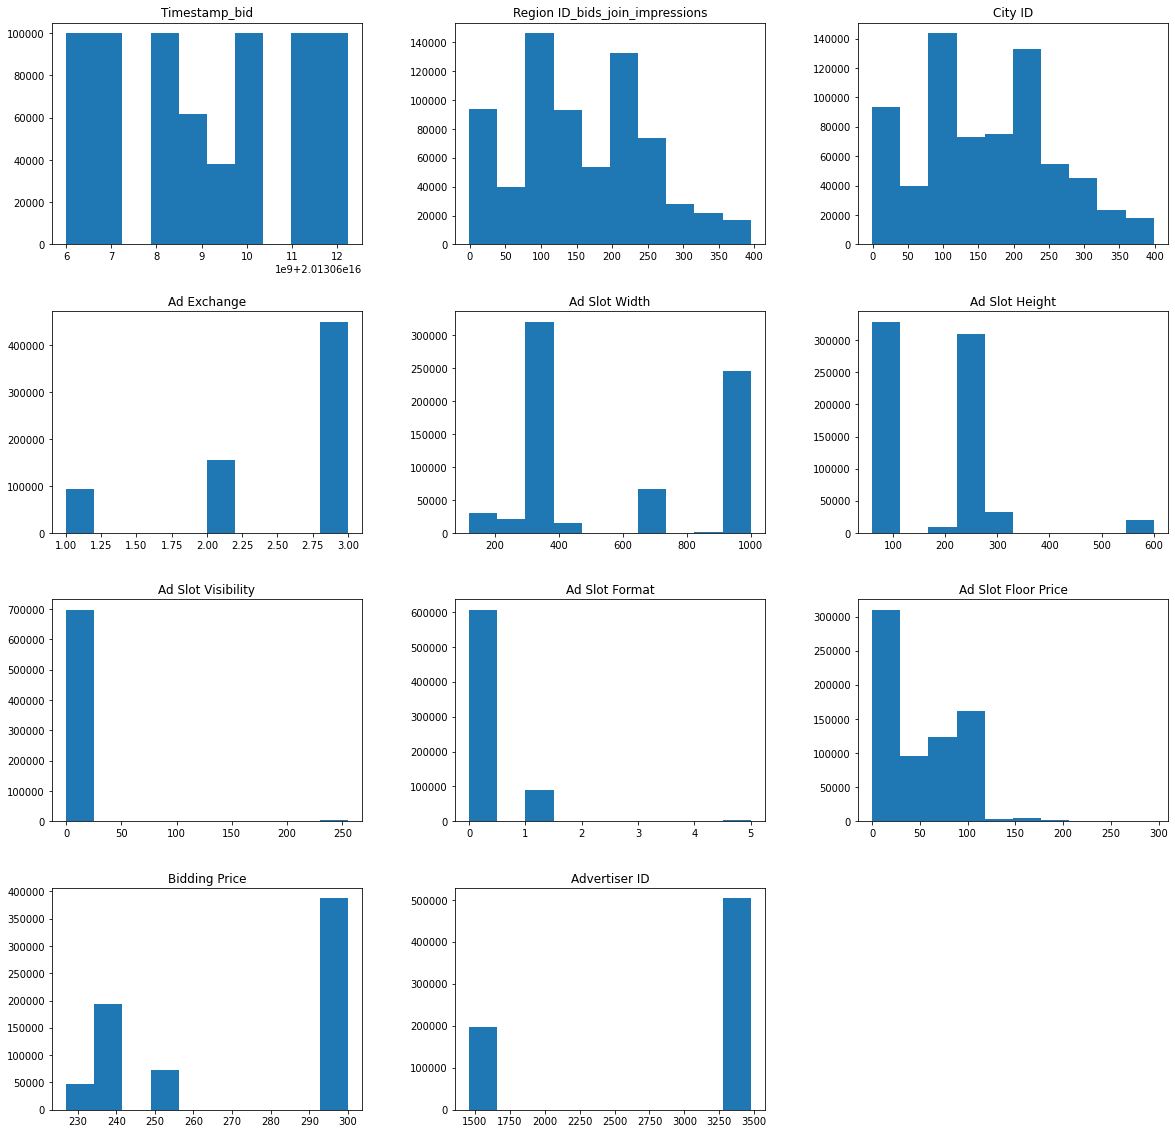

In [ ]:
df[features1].hist(figsize=(20,20), grid=False)


In [ ]:
df['City ID'].value_counts().sort_values(ascending=False)[:50]

219    18003
217    15721
1      14239
222    12783
79     12571
275    11497
101     9869
85      9251
277     8545
7       7824
227     6982
159     6918
0       6620
86      6345
163     6181
81      6077
95      5968
334     5795
2       5730
184     5624
233     5357
84      5112
100     5017
223     4768
239     4630
165     4628
82      4218
129     4205
10      4140
96      4011
90      4007
202     3938
168     3885
4       3771
141     3769
241     3740
97      3699
148     3686
125     3485
205     3433
301     3416
309     3314
87      3298
147     3164
166     3142
126     3000
107     2970
242     2918
150     2769
56      2732
Name: City ID, dtype: int64